# Pyber
GWU Data Analytics Bootcamp Homework 5

* Generally speaking, the higher the number of rides, the lower the average fare.
* Despite having lower average fares, rides in Urban areas still bring in the highest total revenue.
* The more urban an area, the more business Pyber is likely to do in that area.

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read in City data, removing duplicate data 
# Was asked to keep one instance of duplicate city, so kept city instance with higher driver count

city_csv = "raw_data/city_data.csv"
city_df = pd.read_csv(city_csv)
city_df = city_df.loc[(city_df['city'] != "Port James") | (city_df['driver_count'] == 15), :]

# Read in Rides data

rides_csv = "raw_data/ride_data.csv"
ride_df = pd.read_csv(rides_csv)

# Merge data sets

df = pd.merge(city_df, ride_df, on="city")
df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


### Bubble Plot of Ride Sharing Data

Note: Circle size corresponds with driver counts per city.


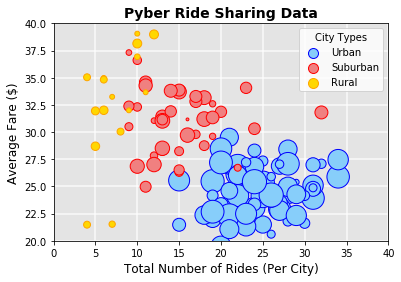

In [2]:
# Filter and aggregate urban data in preparation for charting

urban_df = df.loc[df['type'] == 'Urban', :]
urban_fares = urban_df.groupby('city')['fare'].mean()
urban_rides = urban_df.groupby('city')['ride_id'].count()
urban_drivers = city_df.loc[city_df['type'] == 'Urban', ['city','driver_count']].set_index('city')

# Filter and aggregate suburban data in preparation for charting

suburban_df = df.loc[df['type'] == 'Suburban', :]
suburban_fares = suburban_df.groupby('city')['fare'].mean()
suburban_rides = suburban_df.groupby('city')['ride_id'].count()
suburban_drivers = city_df.loc[city_df['type'] == 'Suburban', ['city','driver_count']].set_index('city')

# Filter and aggregate rural data in preparation for charting

rural_df = df.loc[df['type'] == 'Rural', :]
rural_fares = rural_df.groupby('city')['fare'].mean()
rural_rides = rural_df.groupby('city')['ride_id'].count()
rural_drivers = city_df.loc[city_df['type'] == 'Rural', ['city','driver_count']].set_index('city')

# Create scatterplot and add data

fig, ax = plt.subplots()
plt.scatter(urban_rides, urban_fares, marker="o", facecolors="lightskyblue", edgecolor="blue", s=urban_drivers*8, label="Urban")
plt.scatter(suburban_rides, suburban_fares, marker="o", facecolors="lightcoral", edgecolor="red", s=suburban_drivers*8, label="Suburban")
plt.scatter(rural_rides, rural_fares, marker="o", facecolors="gold", s=rural_drivers*8, label="Rural", edgecolor="orange")

# Format scatterplot, removing outlier datapoint from plot via y-limits

lgnd = ax.legend(title="City Types")
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
plt.xlim(0, 40)
plt.ylim(20, 40)
ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.6)
plt.grid(linewidth=2, color='white', alpha=0.6)
ax.set_axisbelow(True)
plt.title("Pyber Ride Sharing Data", fontweight='bold', fontsize=14)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
print("Note: Circle size corresponds with driver counts per city.")

### Total Fares by City Type

Text(0,0.5,'')

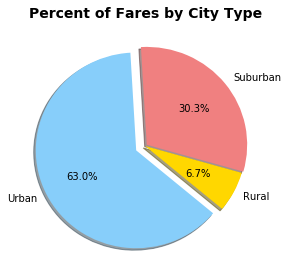

In [3]:
# Create pie chart

colors = ['gold', 'lightcoral', 'lightskyblue']
explode = [0, 0.02, 0.1]
fares_df = df.groupby('type')['fare'].sum()
fares_chart = fares_df.plot(kind='pie', colors=colors, explode=explode, shadow=True, figsize=(4.5,4.5), autopct="%1.1f%%", startangle=-40)
plt.title('Percent of Fares by City Type', fontweight='bold', fontsize=14)
plt.ylabel("")

### Total Rides by City Type

Text(0.5,1,'Percent of Rides by City Type')

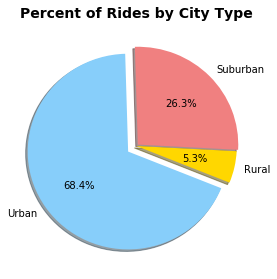

In [4]:
# Create pie chart

trips_df = df.groupby('type')['ride_id'].count()
trips_chart = trips_df.plot(kind='pie', colors=colors, explode=explode, shadow=True, figsize=(4.5,4.5), autopct="%1.1f%%", startangle=-22)
trips_chart.set_ylabel('')
plt.title('Percent of Rides by City Type', fontweight='bold', fontsize=14)

### Total Drivers by City Type

Text(0.5,1,'Percent of Drivers by City Type')

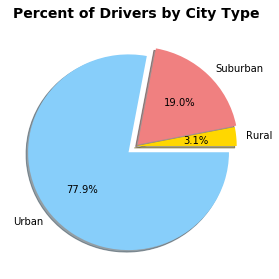

In [5]:
# Create pie chart

drivers_df = city_df.groupby('type')['driver_count'].sum()
drivers_chart = drivers_df.plot(kind='pie', colors=colors, explode=explode, shadow=True, figsize=(4.5,4.5), autopct="%1.1f%%")
drivers_chart.set_ylabel('')
plt.title('Percent of Drivers by City Type', fontweight='bold', fontsize=14)